# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

In [8]:
cities

['xiva',
 'talnakh',
 'meadow lake',
 "dul'durga",
 'port-aux-francais',
 'adamstown',
 'grand falls-windsor',
 'beloyarskiy',
 'bethel',
 'blackmans bay',
 'olonkinbyen',
 'kabansk',
 'ola',
 'grytviken',
 'dunedin',
 'touros',
 'lewistown',
 'cabedelo',
 'dudinka',
 'embi',
 'yellowknife',
 'waitangi',
 'ilulissat',
 'mount gambier',
 'edinburgh of the seven seas',
 'naze',
 'saipan',
 'jayapura',
 'puerto ayora',
 'banda aceh',
 'avarua',
 'namibe',
 'ancud',
 'prince rupert',
 'mccook',
 'fort st. john',
 'punta arenas',
 'portel',
 'sao vicente',
 'whitehorse',
 'tazacorte',
 "ust'-ilimsk",
 'longyearbyen',
 'vorgashor',
 'albany',
 'cidreira',
 'hawaiian paradise park',
 'ijuw',
 'badger',
 'anadyr',
 'santa elena de uairen',
 'east london',
 'cholpon-ata',
 'terrace heights',
 'port shepstone',
 'taiohae',
 'mountain home',
 'holualoa',
 'college',
 'afaahiti',
 'la passe',
 'sitka',
 'port alfred',
 'vila velha',
 'chicxulub puerto',
 'antalaha',
 'moyynkum',
 'lebu',
 'marsh h

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url= "https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xiva
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | meadow lake
Processing Record 4 of Set 1 | dul'durga
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | grand falls-windsor
Processing Record 8 of Set 1 | beloyarskiy
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | kabansk
Processing Record 13 of Set 1 | ola
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | dunedin
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | lewistown
Processing Record 18 of Set 1 | cabedelo
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | embi
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | waitangi
Processing Record 23 of Set

In [10]:
# Convert the cities weather data into a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [11]:
# Display sample data 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,xiva,41.3783,60.3639,20.99,30,99,8.88,UZ,1711401446
1,talnakh,69.4865,88.3972,-36.43,99,48,2.44,RU,1711401447
2,meadow lake,34.8014,-106.5436,11.86,36,100,8.00,US,1711401448
3,dul'durga,50.6761,113.5931,-3.07,61,17,0.85,RU,1711401450
4,port-aux-francais,-49.3500,70.2167,3.77,75,98,14.45,TF,1711401451


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,xiva,41.3783,60.3639,20.99,30,99,8.88,UZ,1711401446
1,talnakh,69.4865,88.3972,-36.43,99,48,2.44,RU,1711401447
2,meadow lake,34.8014,-106.5436,11.86,36,100,8.00,US,1711401448
3,dul'durga,50.6761,113.5931,-3.07,61,17,0.85,RU,1711401450
4,port-aux-francais,-49.3500,70.2167,3.77,75,98,14.45,TF,1711401451


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

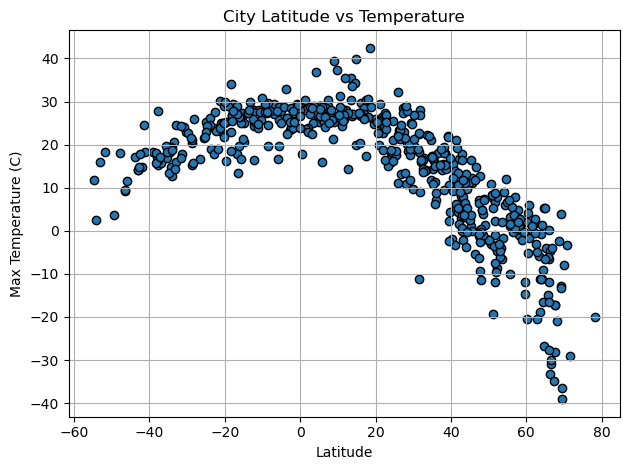

In [29]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

plt.scatter(latitude, temperature, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

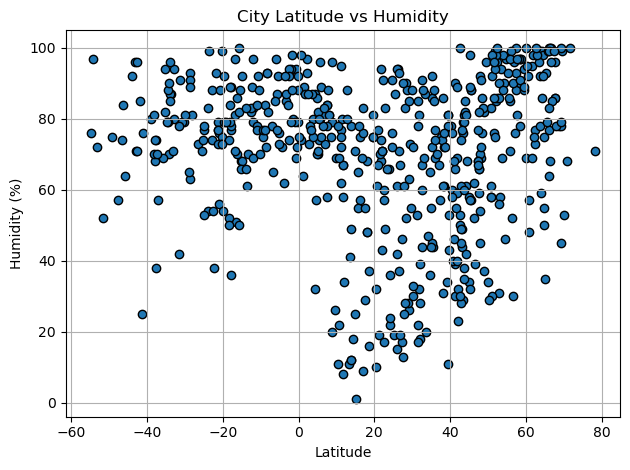

In [30]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

plt.scatter(latitude, humidity, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

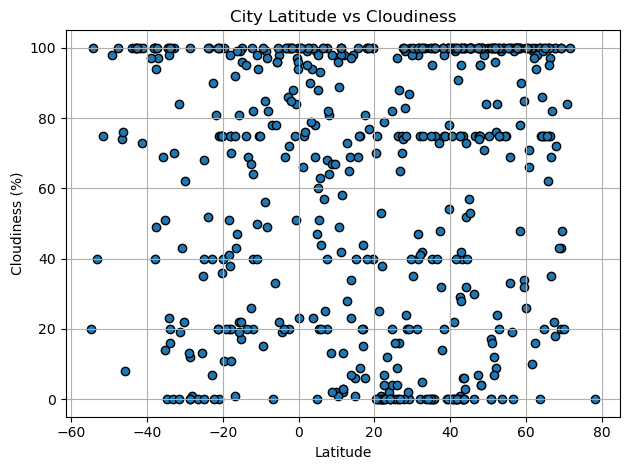

In [32]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']

plt.scatter(latitude, cloudiness, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

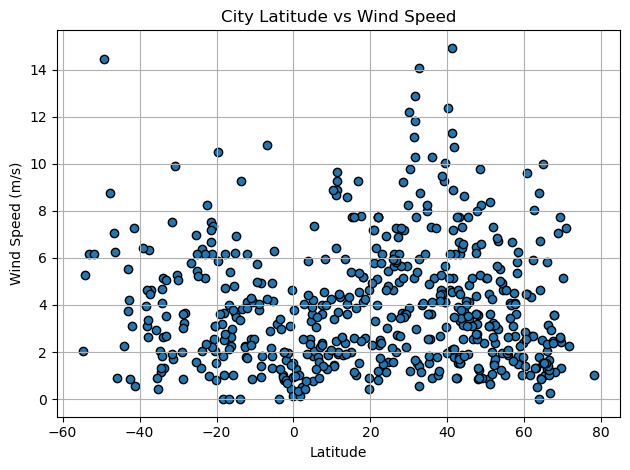

In [34]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df['Wind Speed']

plt.scatter(latitude, wind, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [188]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, ylabel=' '):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = x * slope + intercept
    equation_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f'The r-value is: {r_value:}')
    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red')
    plt.annotate(equation_line, xy=(0.5, 0.90), xycoords='axes fraction', fontsize=12, color='red', bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    
    # Show plot
    plt.tight_layout()
    plt.show()


In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,xiva,41.3783,60.3639,20.99,30,99,8.88,UZ,1711401446
1,talnakh,69.4865,88.3972,-36.43,99,48,2.44,RU,1711401447
2,meadow lake,34.8014,-106.5436,11.86,36,100,8.00,US,1711401448
3,dul'durga,50.6761,113.5931,-3.07,61,17,0.85,RU,1711401450
6,grand falls-windsor,48.9332,-55.6649,1.39,37,71,0.89,CA,1711401453


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,3.77,75,98,14.45,TF,1711401451
5,adamstown,-25.0660,-130.1015,25.33,77,68,5.46,PN,1711401452
9,blackmans bay,-43.0167,147.3167,14.07,71,100,5.53,AU,1711401457
13,grytviken,-54.2811,-36.5092,2.42,97,100,5.26,GS,1711401462
14,dunedin,-45.8742,170.5036,11.56,64,8,0.89,NZ,1711401273


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8692067719369287


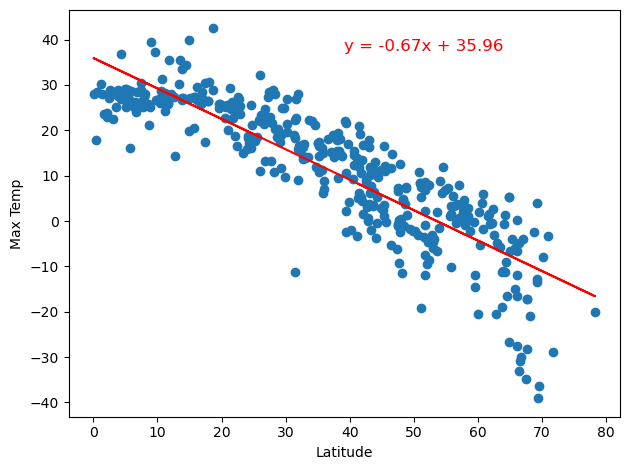

In [189]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

linear_regression_plot(x, y, 'Max Temp')
                       

The r-value is: 0.7235543156439486


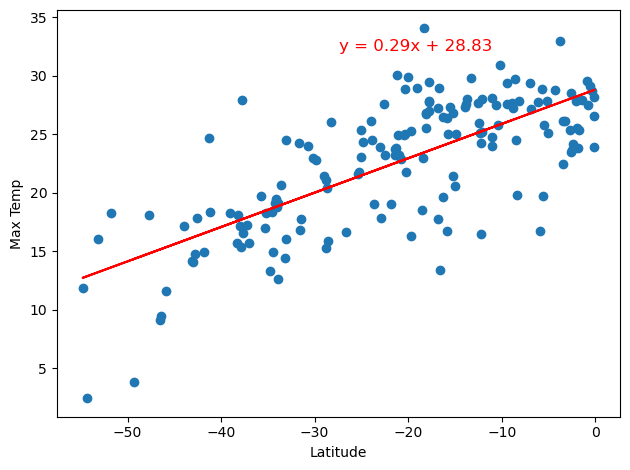

In [190]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

linear_regression_plot(x, y, 'Max Temp')

**Discussion about the linear relationship:** The Northern Hemisphere's -0.87 r-value indicates a strong negative linear relationship between latitude and temperature, while the Southern Hemisphere's r-value of 0.72 indicates a moderate positive linear relationship between latitude and temperature. This suggests that regions in the Northern Hemisphere which are further from the equator experience colder temperatures and regions in the Southern Hemisphere which are closer to the equator experience warmer temperatures. This may be due to the earth's tilt and distribution of solar radiation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24758200149063916


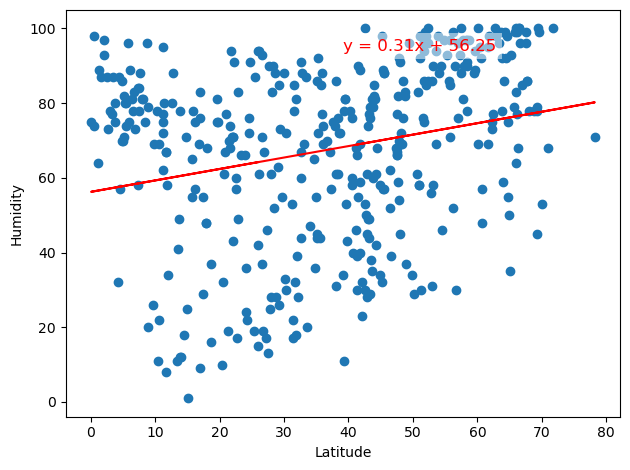

In [191]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

linear_regression_plot(x, y, 'Humidity')

The r-value is: 0.18379722387787853


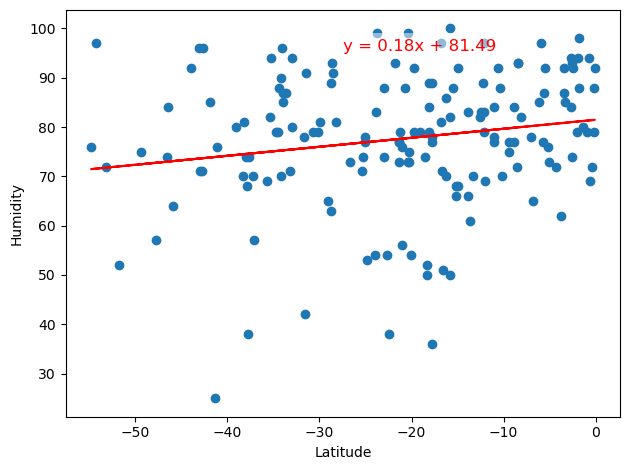

In [192]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

linear_regression_plot(x, y, 'Humidity')

**Discussion about the linear relationship:** The Northern Hemisphere's r-value of 0.25 and the Southern Hemisphere's r-value of 0.18 both indicate a weak positive linear relationship between latitude and humidity. This suggests that humidity tends to increase slightly as latitude rises. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17730668243453954


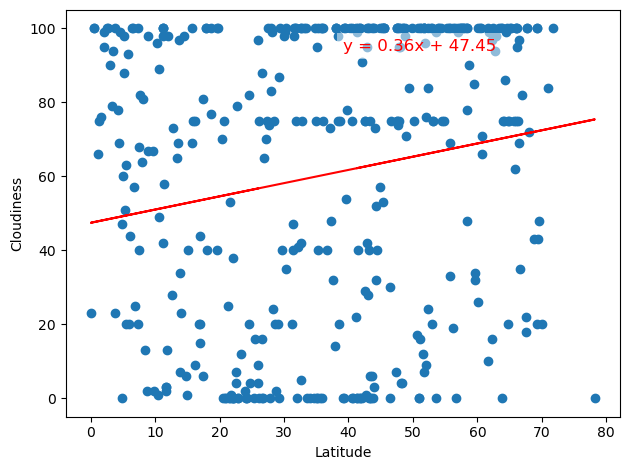

In [193]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

linear_regression_plot(x, y, 'Cloudiness')

The r-value is: 0.05047525386790015


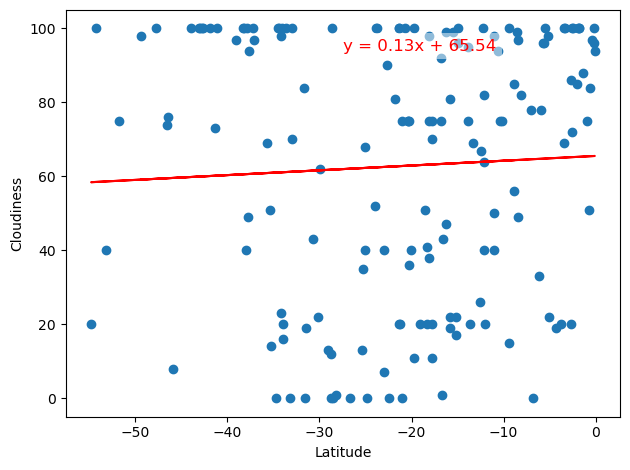

In [194]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

linear_regression_plot(x, y, 'Cloudiness')

**Discussion about the linear relationship:** The Northern Hemisphere's r-value of 0.18 and the Southern Hemisphere's r-value of 0.05 both indicate a weak positive linear relationship between latitude and cloudiness. This suggests that there is a subtle trend of cloudiness as latitude rises.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03742268655574416


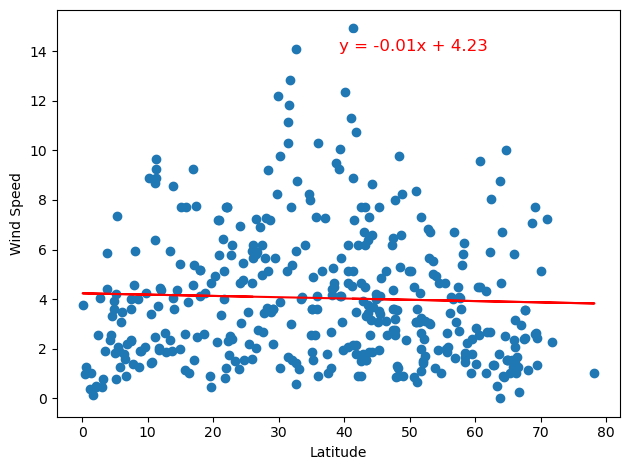

In [195]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

linear_regression_plot(x, y, 'Wind Speed')

The r-value is: -0.28288101704034263


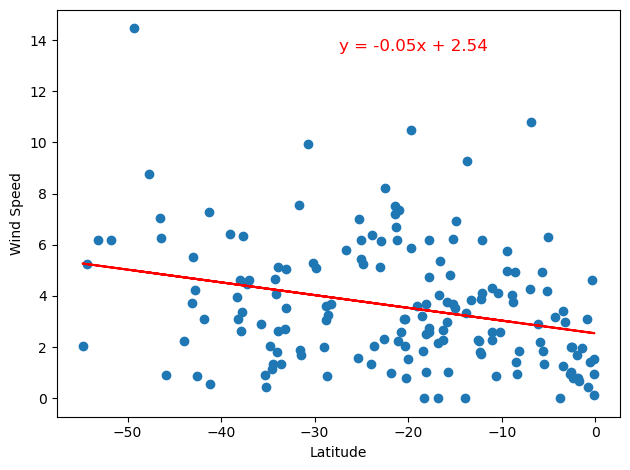

In [196]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

linear_regression_plot(x, y, 'Wind Speed')

**Discussion about the linear relationship:** The Northern Hemisphere's r-value of -0.03 and the Southern Hemisphere's r-value of -0.28 both indicate a weak negative linear relationship between latitude and wind speed. This suggests that while there is a tendency for wind speed to decrease with increasing latitude, the correlations are relatively weak. 